In [42]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("insurance_data.csv")

# Display the first few rows of the dataset
print(df.head())

# Check for any missing values in the dataset
print(df.isna().sum())

# Display basic statistical details of the dataset
print(df.describe())

   age  affordibility  bought_insurance
0   22              1                 0
1   25              0                 0
2   47              1                 1
3   52              0                 0
4   46              1                 1
age                 0
affordibility       0
bought_insurance    0
dtype: int64
             age  affordibility  bought_insurance
count  28.000000      28.000000         28.000000
mean   39.892857       0.678571          0.500000
std    15.497525       0.475595          0.509175
min    18.000000       0.000000          0.000000
25%    25.000000       0.000000          0.000000
50%    45.500000       1.000000          0.500000
75%    54.250000       1.000000          1.000000
max    62.000000       1.000000          1.000000


In [43]:
# Separate features (age and affordability) and target (bought_insurance)
X = df[["age", "affordibility"]]
Y = df[["bought_insurance"]]

# Scale the 'age' feature for better model performance
X['age'] = X['age'] / 100

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)

# Reshape Y_train and Y_test to be a 2D array with one column, which is required by the model
Y_train_reshape = Y_train.values.reshape(-1,1)
Y_test_reshape = Y_test.values.reshape(-1,1)

/var/folders/jq/s0_w8dhs3rsgnytrh30s62l40000gn/T/ipykernel_5650/4057238113.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'] = X['age'] / 100


In [44]:
# Define the sigmoid function, which applies the sigmoid activation to input x
def sigmoid(x):
    return 1/(1+np.exp(-x)) # Ensures values are between 0 and 1

# Define the log loss function to measure the model's performance
def log_loss(Y_true, Y_predicted):
    eps = 1e-15 # Small value to prevent log(0) errors
    Y_predicted = np.clip(Y_predicted, eps, 1 - eps) # Clip predictions for numerical stability
    # Calculate the binary cross-entropy loss
    return -np.mean(Y_true * np.log(Y_predicted) + (1 - Y_true) * np.log(1 - Y_predicted))

# Define a one-layer neural network class for binary classification
class OnelayerNN:
    def __init__(self,shape):
        # Initialize weights randomly and bias to zero
        self.W = np.random.rand(shape,1)
        self.b = 0
        
    # Method to train the model on the given dataset
    def fit(self,X,Y,epochs,lr):
        # Perform forward and backward propagation to update weights and bias
        self.W,self.b,loss = self.forward_backward_propagation(X,Y,epochs,lr)

    # Method to predict outcomes on test data
    def predict(self,X_test):
        # Compute predictions using the sigmoid activation
        return sigmoid(X_test@self.W+self.b)
    
    # Method to evaluate model performance on the test set
    def evaluate(self,X_test,Y_test):
        # Predict on test data
        Y_predict = self.predict(X_test)
        # Calculate and return the log loss
        loss = log_loss(Y_test,Y_predict)

        # Convert predicted probabilities to binary class labels (0 or 1) based on a threshold of 0.5
        Y_predict_labels = np.where(Y_predict > 0.5, 1, 0).reshape(Y_predict.shape[0],)
        # Reshape the true labels from the test set to match the shape of predicted labels for comparison
        Y_test_labels = Y_test.values.reshape(Y_test.shape[0],)

        # Calculate correct predictions by comparing predicted labels with true labels
        correct_predictions = (Y_predict_labels == Y_test_labels).astype(int)

        # Calculate the accuracy as the percentage of correct predictions
        accuracy = np.sum(correct_predictions)*100/correct_predictions.shape[0]

        # Print the log loss and accuracy for the test set
        print(f'Loss: {loss}, Accuracy: {accuracy}')

        # Return the loss and accuracy as the output of the evaluation method
        return loss,accuracy
    
    # Method to perform forward and backward propagation for training
    def forward_backward_propagation(self,X,Y,epochs,lr):
        # Loop over the specified number of epochs
        for epoch in range(epochs+1):
            # Forward pass: Compute linear combination of inputs and weights, and apply sigmoid
            Z = X@self.W+self.b
            Y_predicted = sigmoid(Z)
            # Compute the log loss for monitoring training progress
            loss = log_loss(Y,Y_predicted)

            # Backward pass: Calculate gradients for weights and bias
            dLdZ = (Y_predicted - Y)/Y.shape[0] # Gradient of loss with respect to Z
            dLdW = X.T@dLdZ # Gradient of loss with respect to W
            dLdb = np.sum(dLdZ,axis = 0) # Gradient of loss with respect to b

            # Update weights and bias using gradient descent
            self.W -= dLdW*lr
            self.b -= dLdb*lr

            # Print progress every 1000 epochs
            if epoch%1000 == 0:
                print(f'At Epoch {epoch}: Weight for age: {self.W.values[0][0]}, Weight for affordibility: {self.W.values[1][0]}, b: {self.b.values[0]}, loss: {loss}')

        # Return final weights, bias, and loss after training
        return self.W,self.b,loss
    


In [ ]:
# Initialize the one-layer neural network model with the number of input features
model = OnelayerNN(X_train.shape[1])

# Train the model on the training data with 7000 epochs and a learning rate of 0.03
model.fit(X_train,Y_train_reshape,7000,0.03)

# Evaluate the model's performance on the test set, calculating loss and accuracy
model.evaluate(X_test,Y_test)

# Predict on test data
Y_predict = model.predict(X_test)

# Convert predicted probabilities to binary class labels (0 or 1) based on a threshold of 0.5
Y_predict_labels = np.where(Y_predict > 0.5, 1, 0).reshape(Y_predict.shape[0],)

# Reshape the true labels from the test set to match the shape of predicted labels for comparison
Y_test_labels = Y_test.values.reshape(Y_test.shape[0],)

At Epoch 0: Weight for age: 0.6472273715059638, Weight for affordibility: 0.25469877891490583, b: -0.003148078439162276, loss: 0.672488787161461
At Epoch 1000: Weight for age: 1.4249949601788539, Weight for affordibility: 0.7650873274681871, b: -0.9990663069604183, loss: 0.6003027214275551
At Epoch 2000: Weight for age: 2.2571158870119303, Weight for affordibility: 0.9942031959266033, b: -1.5120048299188273, loss: 0.5664562775125824
At Epoch 3000: Weight for age: 3.0226585994233357, Weight for affordibility: 1.0920044678995156, b: -1.895075734440895, loss: 0.5416550325287376
At Epoch 4000: Weight for age: 3.711579540224135, Weight for affordibility: 1.1458299792321207, b: -2.212790720284693, loss: 0.5223454694492495
At Epoch 5000: Weight for age: 4.327879849503786, Weight for affordibility: 1.184628513781775, b: -2.4897694528165952, loss: 0.5070579589830916
At Epoch 6000: Weight for age: 4.879348147475426, Weight for affordibility: 1.2181184447254336, b: -2.736897957964557, loss: 0.494

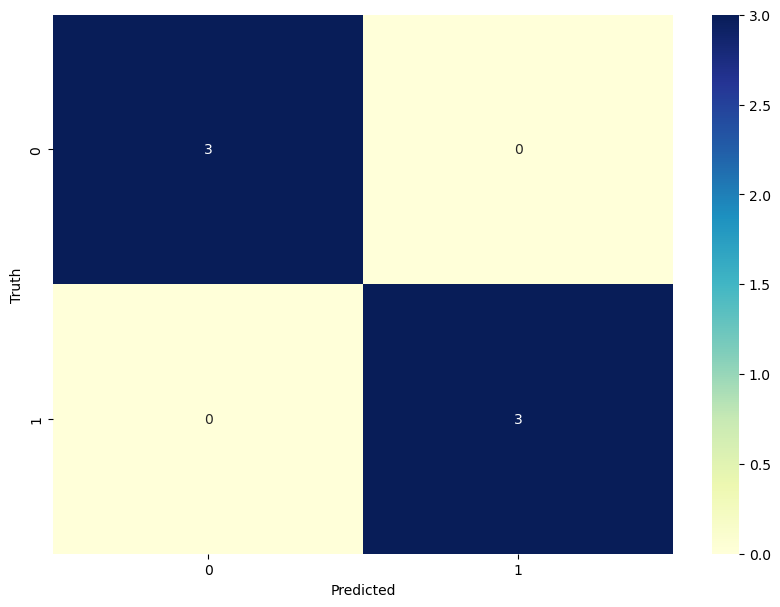

In [46]:
# Generate a confusion matrix to evaluate model performance on test data
cm = tf.math.confusion_matrix(labels=Y_test_labels, predictions=Y_predict_labels)

# Plot the confusion matrix using Seaborn's heatmap for visualization
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()